<a href="https://colab.research.google.com/github/dhan16/colabs/blob/master/ml/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression: Theory







### Model
Given data of n observations {**x<sub>i</sub>**, y<sub>i</sub>}<sub>i=1:n</sub> with y<sub>i</sub> a scalar response and **x<sub>i</sub>** a column vector of size p:
* y<sub>i</sub> = β<sub>1</sub>x<sub>i1</sub> + ... + β<sub>p</sub>x<sub>ip</sub> + ε<sub>i</sub> = x<sub>i</sub><sup>T</sup>β + ε<sub>i</sub>

* or, in vector form: y<sub>i</sub> = **x<sub>i</sub>**<sup>T</sup>**β** + ε<sub>i</sub>

* or, stacking the n equations together in matrix notation: **y** = X**β** + **ε**

### Ordinary Least Squares Solution
Find the coefficients **β** which fit the equations "best", **$\hat{β}$** = arg min L(**β**), where

* Lostt function L(**β**) = ||**y** - X**β**||<sup>2</sup>

* The solution is: **$\hat{β}$** = (X<sup>T</sup>X)<sup>-1</sup> X<sup>T</sup>**y**

where (X<sup>T</sup>X)<sup>-1</sup> X<sup>T</sup> is  the Moore–Penrose pseudoinverse matrix of X

### References
* https://en.wikipedia.org/wiki/Ordinary_least_squares#Linear_model


### Gradient of the loss function

∇<sub>**β**</sub>L = 2X<sup>T</sup>(X**β** - **y**)

### References
* https://www.inf.ed.ac.uk/teaching/courses/mlpr/2016/notes/w3b_regression_gradients.pdf
* https://d2l.ai/chapter_linear-regression/linear-regression.html#sec-linear-regression

## Utility, visualisation and data generation functions

In [19]:
#@title Utility functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def scale(x, a, b):
  '''Scale numpy array to be between min a and max b'''
  range = np.amax(x) - np.amin(x)
  return x / range * (b - a) + a


''' Create X_mat with first column as 1's from x, where x is an array of arrays'''
def make_X_mat(x):
  X_mat=np.vstack((np.ones(len(x)), np.array(x).T)).T
  return X_mat


def predict_y_from_X(X_mat, beta):
  return X_mat.dot(beta)


def predict_y(x, beta):
  X_mat = make_X_mat(x)
  return predict_y_from_X(X_mat, beta)


def show_metrics(x, y, beta):
  y_pred = predict_y(x, beta)
  print('mse: {:.4f}'.format(mean_squared_error(y, y_pred)))
  print('r2: {:.4f}'.format(r2_score(y, y_pred)))

In [20]:
#@title Visualisation functions
from matplotlib.font_manager import X11FontDirectories
import matplotlib.pyplot as plt

def plot2D(x, y, beta):
  plt.plot(x, y, 'o', label='data')
  xx = np.linspace(min(x), max(x), 101)
  yy = predict_y(xx, beta)
  plt.plot(xx, yy, label='least squares fit, $y = {:.2f} + {:.2f} * x$'.format(beta[0], beta[1]))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(framealpha=1, shadow=True)
  plt.grid(alpha=0.25)
  plt.show()


def plot3D(x, y, beta):
  # https://www.kaggle.com/code/spidy20/3d-visualization-of-multiple-linear-regression/notebook
  # https://gist.github.com/aricooperdavis/c658fc1c5d9bdc5b50ec94602328073b
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlabel("X1")
  ax.set_ylabel("X2")
  ax.set_zlabel("y")
  ax.scatter(x[:,0], x[:,1], y, marker='.', color='red')

  x1_min, x1_max = min(x[:,0]), max(x[:,0])
  x2_min, x2_max = min(x[:,1]), max(x[:,1])
  xs = scale(np.tile(np.arange(101), (101,1)), x1_min, x1_max)
  ys = scale(np.tile(np.arange(101), (101,1)).T, x2_min, x2_max)
  zs = beta[0] + xs*beta[1]+ ys*beta[2]
  ax.plot_surface(xs,ys,zs, alpha=0.3)
  plt.show()

In [21]:
def show(x, y, beta, metrics = True, plot = True):
  print('beta: {}'.format(beta))

  if metrics:
    show_metrics(x, y, beta)
  
  if plot:
    if len(beta) == 2:
      plot2D(x, y, beta)
    elif len(beta) == 3:
      plot3D(x, y, beta)


In [22]:
#@title Data generation functions
# https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/validation_and_test_sets.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=validation_tf2-colab&hl=en
import numpy as np

def randomLinearData(beta, n):
  np.random.seed(100) # seed random number generator
  x = 1000 * np.random.rand(n)
  e = 100 * np.random.rand(len(x))
  y = beta[0] + x*beta[1] + e
  return ([[e] for e in x], y)

from sklearn import datasets
def make_regression(n_samples, n_features, intercept=10):
  return datasets.make_regression(n_samples=n_samples,#number of samples
                                      n_features=n_features,#number of features
                                      n_informative=n_features,#number of useful features 
                                      bias=intercept,
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

## Linear Regression:  OLS methods


1. **$\hat{β}$** = (X<sup>T</sup>X)<sup>-1</sup> X<sup>T</sup>**y**. https://cmdlinetips.com/2020/03/linear-regression-using-matrix-multiplication-in-python-using-numpy/
2. **$\hat{β}$** = X<sup>pseudo-inverse</sup> **y**
3. scipy.linalg.lstsq https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq
4. sklearn LinearRegression https://cmdlinetips.com/2020/03/linear-regression-using-matrix-multiplication-in-python-using-numpy/


In [23]:
#@title OLS library
import numpy as np
from scipy.linalg import lstsq
from sklearn.linear_model import LinearRegression

# 1. https://cmdlinetips.com/2020/03/linear-regression-using-matrix-multiplication-in-python-using-numpy/
def ols_with_inverse(X_mat, y):
  return np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)

# 2.
def ols_with_pseudoinverse(X_mat, y):
  return np.linalg.pinv(X_mat).dot(y)

# 3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq
def ols_with_numpy_lstsq(X_mat, y):
  beta_hat, res, rnk, s = lstsq(X_mat, y)
  return beta_hat
  
# 4. sklearn.linear_model.LinearRegression https://cmdlinetips.com/2020/03/linear-regression-using-matrix-multiplication-in-python-using-numpy/
def ols_with_sklearn(X_mat, y):
  lr = LinearRegression().fit(x, y)
  beta_hat = np.insert(lr.coef_, 0, lr.intercept_, axis=0)
  return beta_hat

def show_olss(x, y, inv=False, pinv=False, lstsq=False, sklearn=True):
  X_mat=make_X_mat(x)
  if inv:
    show(x, y, ols_with_inverse(X_mat, y))
  if pinv:
    show(x, y, ols_with_pseudoinverse(X_mat, y))
  if lstsq:
    show(x, y, ols_with_numpy_lstsq(X_mat, y))
  if sklearn:
    show(x, y, ols_with_sklearn(X_mat, y))

### Run

beta: [104.43612899   2.99467652]
mse: 822.7909
r2: 0.9989


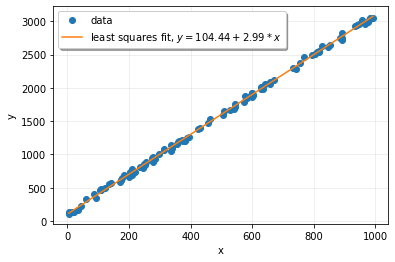

beta: [104.43612899   2.99467652]
mse: 822.7909
r2: 0.9989


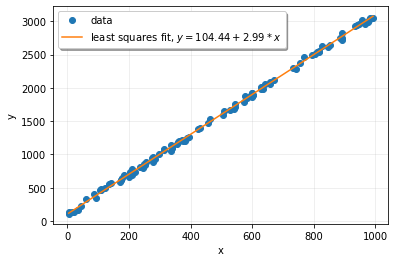

beta: [104.43612899   2.99467652]
mse: 822.7909
r2: 0.9989


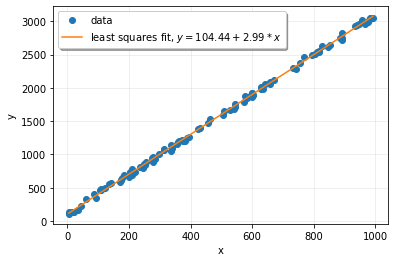

beta: [104.43612899   2.99467652]
mse: 822.7909
r2: 0.9989


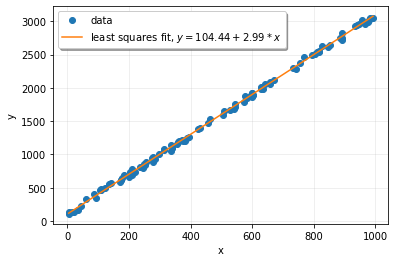

In [24]:
(x, y) = randomLinearData([50, 3], 100)
show_olss(x, y, inv=True, pinv=True, lstsq=True, sklearn=True)

42.38550485581797
beta: [ 9.18581817 42.61943029]
mse: 114.1715
r2: 0.9417


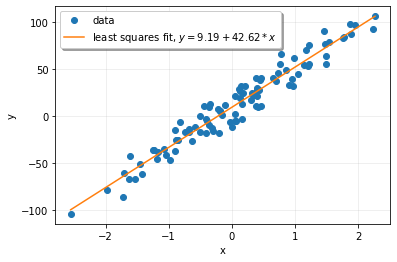

In [25]:
x, y, coef = make_regression(n_samples=100, n_features=1)
print(coef)
show_olss(x, y)

[41.09157343 40.05104636]
beta: [ 2.54846844 40.81900699 40.48278639]
mse: 90.5928
r2: 0.9718


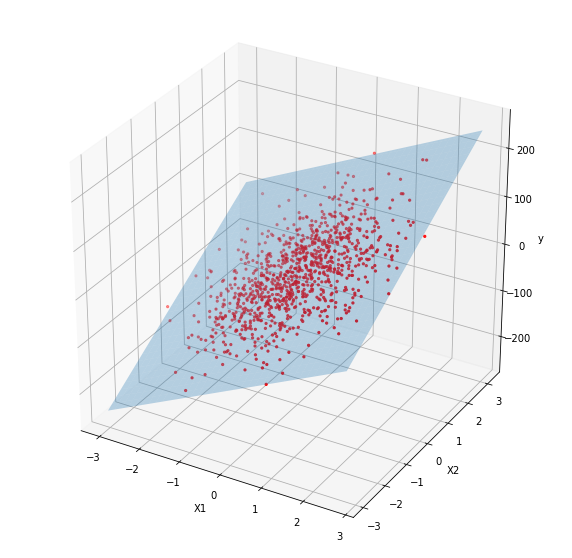

In [26]:
x, y, coef = make_regression(n_samples=1000, n_features=2, intercept=3)
# print(x)
print(coef)
show_olss(x, y)

## Linear Regression: Gradient descent



https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/

In [62]:
#@title Gradient Descent library

# function to compute the loss for current values of beta
def lr_loss(X_mat, y, theta):
  h = predict_y_from_X(X_mat, theta)
  J = np.dot((h - y).transpose(), (h - y))
  return J/2


# function to compute gradient for regression loss function
def lr_grad(X_mat, y, beta):
  h = predict_y_from_X(X_mat, beta)
  grad = np.dot(X_mat.transpose(), (h - y))
  return grad


from sklearn.utils import shuffle
from sklearn.utils import gen_batches
# function to perform mini-batch gradient descent
def lr_gradient_descent(x, y, epochs=3,learning_rate=0.001, batch_size=100):
  beta = np.zeros(x.shape[1] + 1) # + 1 for intercept
  losses = []
  for itr in range(epochs):
    x, y = shuffle(x, y)
    for batch_slice in gen_batches(len(y), batch_size):
      x_mini, y_mini = x[batch_slice], y[batch_slice]
      X_mat = make_X_mat(x_mini) # adds column for intercept
      beta = beta - learning_rate * lr_grad(X_mat, y_mini, beta)
      losses.append(lr_loss(X_mat, y_mini, beta))
 
  return beta, losses


def do_and_show_lrgd(x, y, epochs=3,learning_rate=0.001, batch_size=100):
  beta, losses = lr_gradient_descent(x, y, epochs=epochs, learning_rate=learning_rate, batch_size=batch_size)
  print(beta)
  print(losses)
  if len(beta) == 2:
    plot2D(x, y, beta)
  show_olss(x, y)

### Run

42.38550485581797
[ 9.30659145 42.62451934]
[14970.648988899247, 8064.171244709985, 4411.818420697868, 632.1362575210202, 2754.851435178786, 2440.5840654531085, 2147.691442534306, 121.2783581315063, 2156.9249513803397, 2112.8346447506865, 1457.949143125672, 79.71431823628919, 1609.1191202772147, 1575.6938947712365, 2171.577473191473, 257.23593927389925, 2088.462033124165, 1207.6516888123015, 2054.0774394922446, 330.33938482079753, 1746.316207592075, 1928.9642078537863, 1559.4911613183544, 396.34560140784754, 2036.4859991989292, 1844.5988270475605, 1548.112153140055, 189.03470247059312, 1383.1784748788823, 2040.788923145179, 1855.673564314656, 368.16959554539017, 2107.6196142394083, 1223.3478854703503, 2146.796715837197, 187.49613868198614, 1846.7319087647552, 1642.174560880212, 2049.88287686434, 138.95228518288243, 1991.508977686612, 1563.6356381902096, 1745.7244778102959, 393.3685736668311, 1840.2886049202043, 1763.4912545788873, 1591.5742554375665, 480.46212015097365, 2161.0410032600

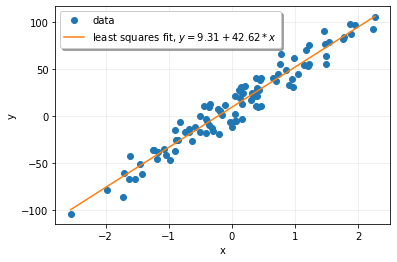

beta: [ 9.18581817 42.61943029]
mse: 114.1715
r2: 0.9417


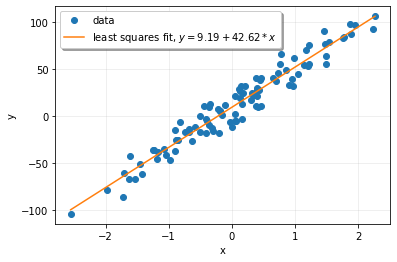

In [70]:
x, y, coef = make_regression(n_samples=100, n_features=1)
print(coef)

do_and_show_lrgd(x, y, batch_size=32, epochs=20, learning_rate=.01)

## Linear Regression; Gradient descent with automatic differentiation


* https://mdrk.io/introduction-to-automatic-differentiation/


## Linear Regression: TensorFlow


References

* https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/validation_and_test_sets.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=validation_tf2-colab&hl=en#scrollTo=FBhNIdUatOU6

* https://colab.research.google.com/github/kaustubholpadkar/Predicting-House-Price-using-Multivariate-Linear-Regression/blob/master/Multivariate_Linear_Regression_Python.ipynb

* https://www.coursera.org/projects/regression-automatic-differentiation-tensorflow



In [29]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [30]:
#@title Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## Linear Regression using JAX


# ML

## Feature Engineering

* Load data
* Shuffle
* Split into training, validation and test. 
* Scale label column to meaningful values

Features
* Bucketize, cross 
* Scale features - min max or z scale


References

* https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/representation_with_a_feature_cross.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=representation_tf2-colab&hl=en


## Define and Train Models
* create model
* train model
* plot loss curves
